## Problem statement:-
- Extract 3000 reviews for Lionking movie which was released in july 2019 from rotten tomatoes.com
- extract these columns:
-  a. ReviewID
-  b. Reviewer Name
-  c. Review
-  d. Rating
-  e. Date-of-Review
- Label the Review Sentiment(0 for  "positive" and 1 for "negative) based on rating >3 'Positive' else 'Negtive binary class
- Need to develop visualizations to find any rellationship between the features to the Sentiment whether good/bad from the data 

- This particular assessment of reviews helps customers before going a movie,or purchasing and for production house they will know which kind of movies the audience will like how they are percieving the movie  and for online sites they would know how many users are accessing their portal to grow their business and recommending similarly liked movies to the users 


# Approach
- Collected the data from  rotten tomatoes.comsite for lionking movie and read it as a dataframe 
- Extracted necessary columns ReviewId,review_text,date,rating 
- Split the date in to month,day then performed exploratory data analysis on reviews 

In [1]:
#importing necessary libraries 
import requests
import time
import pandas as pd 
from textblob import TextBlob


In [2]:
headers = {
'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
'X-Requested-With': 'XMLHttpRequest',
}

In [3]:
payload = {
'direction': 'next',
'endCursor': '',
'startCursor': '',
}

In [4]:
url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'

In [5]:
s = requests.Session()

## extracting 3000 reviews from url each page has 10 reviews so,for collecting 3000 reviews  300 pages 

In [6]:
user,userid,review_text,createDate,updateDate,rating = [],[],[],[],[],[]
counter = 0
reviews = 0
while counter < 300:
    r =s.get(url, headers=headers, params=payload)
    data = r.json()

    if not data['pageInfo']['hasNextPage']:
        break

    payload['endCursor'] = data['pageInfo']['endCursor']
    payload['startCursor'] = data['pageInfo']['startCursor']

    for x in data['reviews']:
        user.append(x['user']['displayName'])
        userid.append(x['user']['userId'])
        review_text.append(x['review'])
        createDate.append(x['createDate'])
        updateDate.append(x['updateDate'])
        rating.append(x['score'])
        reviews = reviews + 1
        
    time.sleep(5)
    counter = counter + 1

In [7]:
lionking_reviewsdf = pd.DataFrame([user,userid,review_text,createDate,updateDate,rating]).T

In [8]:
lionking_reviewsdf.columns = ['user','userid','review_text','createDate','updateDate','rating']

In [9]:
lionking_reviewsdf.head(5)

,user,userid,review_text,createDate,updateDate,rating
0,Nolan D,978373748,Ya boi did not enjoy his time at the cinema on...,2019-11-05T04:00:12.080Z,2019-11-05T04:14:53.265Z,1.5
1,Carrie C,978373727,The cgi looked amazing but lost the emotion in...,2019-11-05T03:06:46.593Z,2019-11-05T03:06:50.349Z,1
2,None,260324547,Pretty much the same as the first movie,2019-11-04T22:36:29.658Z,2019-11-04T22:36:29.658Z,4.5
3,Steve S,900948227,I haven't been overly excited about the idea o...,2019-11-04T19:27:28.581Z,2019-11-04T19:27:34.660Z,2
4,None,260026611,How are they gonna make an entire movie copyin...,2019-11-04T15:59:24.243Z,2019-11-04T15:59:24.243Z,0.5


In [10]:
import pandas as pd
lionking_reviewsdf.to_csv("lionking_reviews.csv",index=True)

In [11]:
reviews=pd.read_csv("lionking_reviews.csv")

In [12]:
reviews.head()

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating
0,0,Nolan D,978373748,Ya boi did not enjoy his time at the cinema on...,2019-11-05T04:00:12.080Z,2019-11-05T04:14:53.265Z,1.5
1,1,Carrie C,978373727,The cgi looked amazing but lost the emotion in...,2019-11-05T03:06:46.593Z,2019-11-05T03:06:50.349Z,1.0
2,2,NaN,260324547,Pretty much the same as the first movie,2019-11-04T22:36:29.658Z,2019-11-04T22:36:29.658Z,4.5
3,3,Steve S,900948227,I haven't been overly excited about the idea o...,2019-11-04T19:27:28.581Z,2019-11-04T19:27:34.660Z,2.0
4,4,NaN,260026611,How are they gonna make an entire movie copyin...,2019-11-04T15:59:24.243Z,2019-11-04T15:59:24.243Z,0.5


In [13]:
reviews.dtypes

Unnamed: 0       int64
user            object
userid          object
review_text     object
createDate      object
updateDate      object
rating         float64
dtype: object

In [14]:
#date has time info too which we dont require extracting only date 

In [15]:
import datetime
reviews['createDate'] = pd.to_datetime(reviews['createDate']).dt.date
reviews['updateDate'] = pd.to_datetime(reviews['updateDate']).dt.date

In [16]:
reviews['createDate'] = pd.to_datetime(reviews['createDate'],format = "%Y/%m/%d")
reviews['updateDate'] = pd.to_datetime(reviews['updateDate'],format = "%Y/%m/%d ")

In [17]:
#creating Sentiment based on rating 
reviews["Sentiment"] = reviews["rating"].apply(lambda x: 'Bad' if x < 3 else 'Good')

In [18]:
reviews.head(3)

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating,Sentiment
0,0,Nolan D,978373748,Ya boi did not enjoy his time at the cinema on...,2019-11-05,2019-11-05,1.5,Bad
1,1,Carrie C,978373727,The cgi looked amazing but lost the emotion in...,2019-11-05,2019-11-05,1.0,Bad
2,2,NaN,260324547,Pretty much the same as the first movie,2019-11-04,2019-11-04,4.5,Good


In [19]:
reviews['Sentiment'] = reviews['Sentiment'].astype('category')

## extracting month, day from date 

In [20]:
reviews['Month'] = reviews['createDate'].dt.month
reviews['Day'] = reviews['createDate'].dt.day
reviews['Day_number'] = reviews['createDate'].dt.dayofweek
reviews['Day_Name'] = reviews['createDate'].dt.weekday_name

In [21]:
reviews.head(2)

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating,Sentiment,Month,Day,Day_number,Day_Name
0,0,Nolan D,978373748,Ya boi did not enjoy his time at the cinema on...,2019-11-05,2019-11-05,1.5,Bad,11,5,1,Tuesday
1,1,Carrie C,978373727,The cgi looked amazing but lost the emotion in...,2019-11-05,2019-11-05,1.0,Bad,11,5,1,Tuesday


In [22]:
reviews.isna().sum()# ignore since only username has nulls 

Unnamed: 0       0
user           208
userid           0
review_text      0
createDate       0
updateDate       0
rating           0
Sentiment        0
Month            0
Day              0
Day_number       0
Day_Name         0
dtype: int64

In [23]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'Sentiments Vs Number of Reviews ')

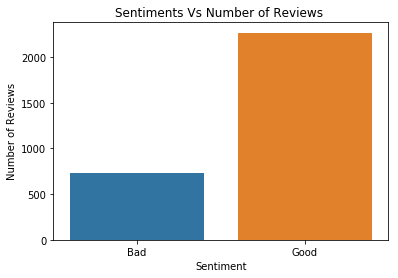

In [24]:
counts= reviews.Sentiment.value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.xlabel("Sentiment")
plt.ylabel("counts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiments Vs Number of Reviews ")

##O servation
- 82%of the reviews were with "Good" Sentiment only 18%contain "Bad"

In [25]:
reviews['Sentiment'].value_counts()

Good    2267
Bad      733
Name: Sentiment, dtype: int64

In [26]:
reviews.head()

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating,Sentiment,Month,Day,Day_number,Day_Name
0,0,Nolan D,978373748,Ya boi did not enjoy his time at the cinema on...,2019-11-05,2019-11-05,1.5,Bad,11,5,1,Tuesday
1,1,Carrie C,978373727,The cgi looked amazing but lost the emotion in...,2019-11-05,2019-11-05,1.0,Bad,11,5,1,Tuesday
2,2,NaN,260324547,Pretty much the same as the first movie,2019-11-04,2019-11-04,4.5,Good,11,4,0,Monday
3,3,Steve S,900948227,I haven't been overly excited about the idea o...,2019-11-04,2019-11-04,2.0,Bad,11,4,0,Monday
4,4,NaN,260026611,How are they gonna make an entire movie copyin...,2019-11-04,2019-11-04,0.5,Bad,11,4,0,Monday


In [27]:
counts= reviews.Sentiment.value_counts()

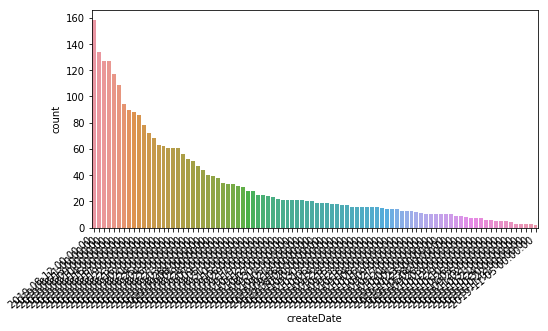

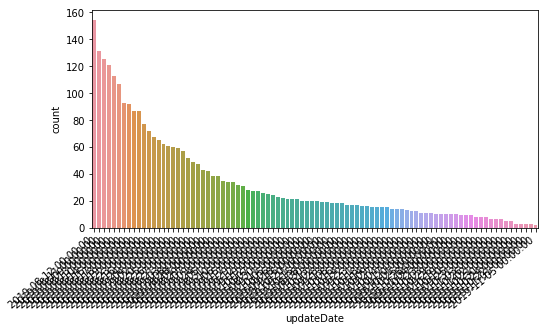

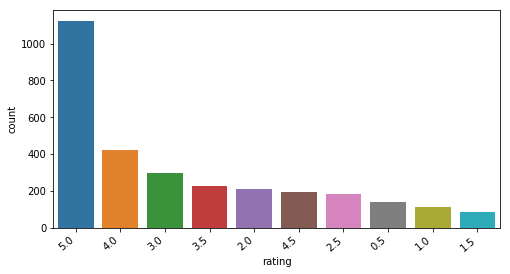

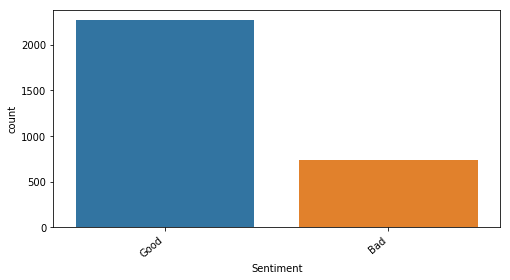

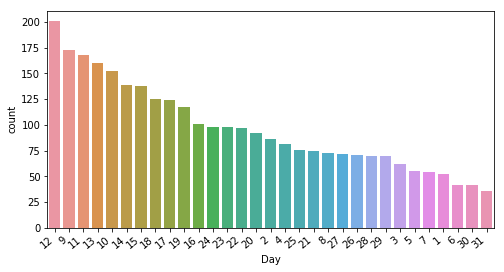

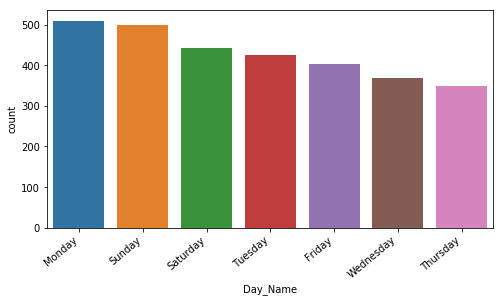

In [28]:
for cols in reviews.drop(["Unnamed: 0","userid","review_text","Month","userid","Day_number","user",], axis=1).columns:
    plt.figure(figsize = (8,4))
    ax = sns.countplot(x= cols, data=reviews, order = reviews[cols].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

# observations 
- Though the movie was released in july19 most of the reviews were in August monthmight be due to summer holidays in August USA. 
- Highest number of reviews in August 5
- less number of reviews on August 29
- Most of the reviews which are written were  updated on the same day  in august month
- In all good reviews most of the rating is '5'
- in all bad Reviews least Review was 1.5
- Most of the reviews are written on 'Monday'

Text(0.5,1,'Number of Reviews in  Month')

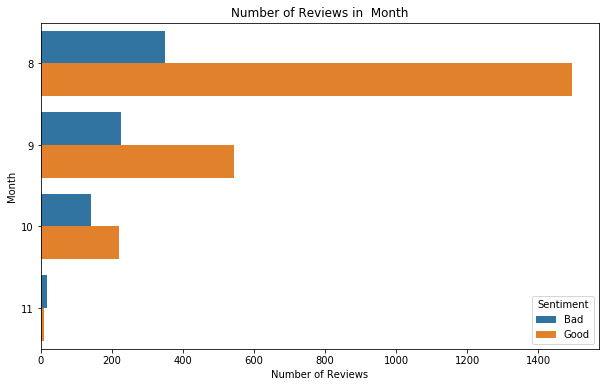

In [29]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y="Month", hue="Sentiment", data=reviews, orient = "h")
ax.set_xlabel('Number of Reviews')
ax.set_title('Number of Reviews in  Month')

Text(0.5,1,'Number of Reviews in each day ')

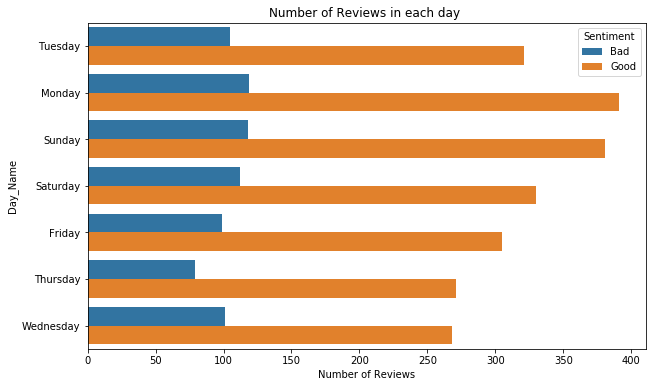

In [30]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y="Day_Name", hue="Sentiment", data=reviews, orient = "h")
ax.set_xlabel('Number of Reviews')
ax.set_title('Number of Reviews in each day ')

- monday and sunday  have high number of reviews compared to rest of the days  
- saturday have  have less number of reviews 

# number of words in reviews 

In [31]:
reviews["num_words"]=reviews['review_text'].str.split().str.len()

In [32]:
reviews[['review_text','Sentiment','num_words']].head()

,review_text,Sentiment,num_words
0,Ya boi did not enjoy his time at the cinema on...,Bad,13
1,The cgi looked amazing but lost the emotion in...,Bad,52
2,Pretty much the same as the first movie,Good,8
3,I haven't been overly excited about the idea o...,Bad,170
4,How are they gonna make an entire movie copyin...,Bad,43


In [33]:
reviews.groupby('Sentiment').agg({'num_words':["min","median","mean","max","count"]})

num_words                             
                min median       mean  max count
Sentiment                                       
Bad               2     23  41.222374  699   733
Good              1     14  23.902073  773  2267

- in good sentiment min words is 2 and in bad it's 3
- the median number of words in bad is 23,good is 14 

Text(0,0.5,'Number of Reviews')

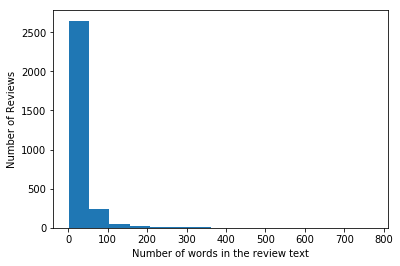

In [34]:
plt.hist(reviews['num_words'], bins=15)
plt.xlabel("Number of words in the review text")
plt.ylabel("Number of Reviews")

- around 2600 reviews contain below 60 words 
- Around 200 reviews have 100 words 
- very few reviews contain 200 to 300 words 

# average word count per sentence to Sentiment

In [35]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_words_sent'] = reviews['review_text'].apply(lambda x: avg_word(x))
reviews[['review_text','avg_words_sent']].head()

,review_text,avg_words_sent
0,Ya boi did not enjoy his time at the cinema on...,3.384615
1,The cgi looked amazing but lost the emotion in...,4.480769
2,Pretty much the same as the first movie,4.000000
3,I haven't been overly excited about the idea o...,4.747059
4,How are they gonna make an entire movie copyin...,4.534884


- per sentence in review text was around 4 to 5 words 

In [36]:
reviews.groupby('Sentiment').agg({'avg_words_sent':["min","median","mean","max","count"]})

avg_words_sent                                
                     min    median      mean   max count
Sentiment                                               
Bad             2.833333  4.620000  4.714955  10.5   733
Good            2.500000  4.557692  4.727171  19.0  2267

- in Bad reviews minimum words used was 2.875 and maximum words 10.5 median 4.6 in all bad reviews  
- in good reviews minimum words used was 2.5 and maximum words 12 good reviews have most of the words 

In [37]:
#reviews which have less than 100 words taken in to reviews_100
reviews_100 = reviews[reviews['num_words']<100]
reviews_100.groupby('Sentiment').agg({'num_words':["min","median","mean","max","count"]})

num_words                            
                min median       mean max count
Sentiment                                      
Bad               2     20  27.909091  99   671
Good              1     14  19.482337  98  2208

Text(0,0.5,'Number of Reviews')

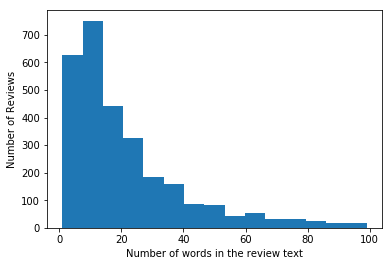

In [38]:
plt.hist(reviews_100['num_words'], bins=15)
plt.xlabel("Number of words in the review text")
plt.ylabel("Number of Reviews")

- from the above plot observed that around 2600 reviews contain below 60 words to check it further how many words per review
- reviews_100 data collected
- around 800 reviews have less than 20words 
- around 500 reviews have less than 30words 
- around 150 review have  less than 40words 
- around 20 to 30 reviews have below 60 and 80 words 
- around 20 reviews only have upto 100 words in their reviews 
- observed that most user swho writes reviews in less words 
- particularly around 10 to 20 users who liked the movie alot and wrote a good review in 100 words 

In [39]:
reviews.head(3)

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating,Sentiment,Month,Day,Day_number,Day_Name,num_words,avg_words_sent
0,0,Nolan D,978373748,Ya boi did not enjoy his time at the cinema on...,2019-11-05,2019-11-05,1.5,Bad,11,5,1,Tuesday,13,3.384615
1,1,Carrie C,978373727,The cgi looked amazing but lost the emotion in...,2019-11-05,2019-11-05,1.0,Bad,11,5,1,Tuesday,52,4.480769
2,2,NaN,260324547,Pretty much the same as the first movie,2019-11-04,2019-11-04,4.5,Good,11,4,0,Monday,8,4.000000


## top 5 highest Positive reviews  

In [40]:
# textblob#library for processing textual data
from textblob import TextBlob# offers features like Sentiment analysis 

## polarity score tells us that the given  English phrase is positive or negative Sentiment.

In [41]:
reviews['polarity'] = reviews['review_text'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['review_text'].astype(str).apply(len)
reviews['word_count'] = reviews['review_text'].apply(lambda x: len(str(x).split()))


- to preview whether the sentiment polarity score works
- let's  randomly select 5 reviews with the highest sentiment polarity score
- for ex:-TextBlob("not a very great caliculation").sentiment 
- Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

- subjectivity of about 0.6, meaning it is fairly subjective.
- polarity of about -0.3, meaning it is slightly negative


# top 5 highest positive reviews 

In [42]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = reviews.loc[reviews.polarity == 1, ['review_text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

I loved it and so did my kids!!!
It was well-done. Great movie!
This movie is still GREAT! nothing beats being a kid and watching the animated version, but this is absolutely awesome!
Thought it was great!
Loved everything!! Well done Disney!!!!


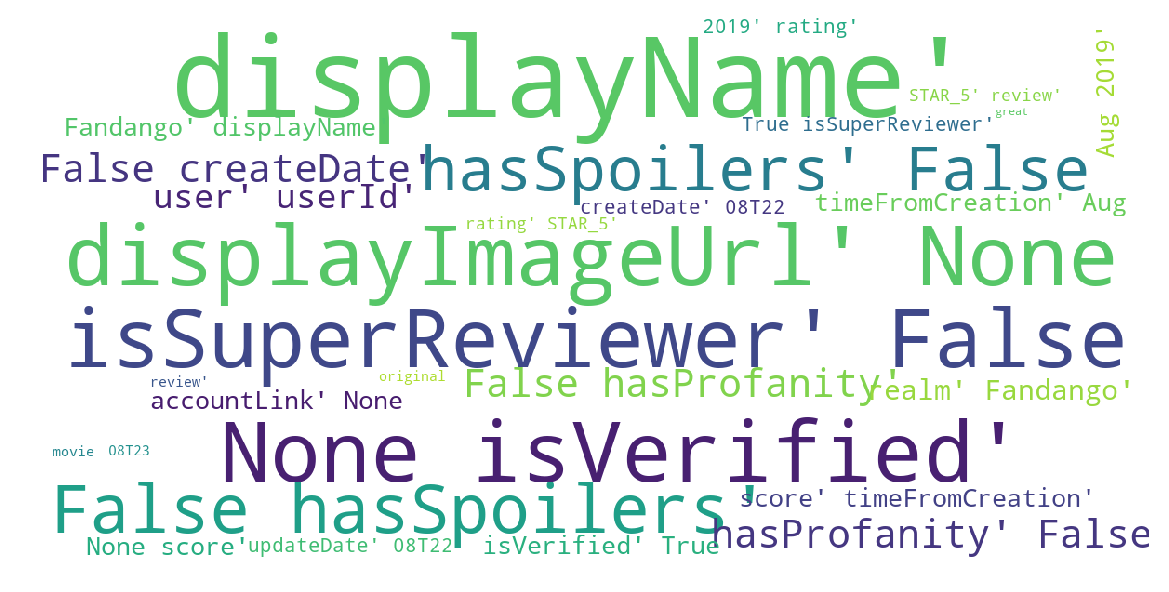

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(reviews, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews["review_text"])

In [44]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl =reviews.loc[reviews.polarity == 0, ['review_text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Recreation of opening sequence....DECENT!!!!
Lions talk ghetto... no emotion to hold on to..
No soul, no heart, no feelings, just a ball of millionaire visual effects from Disney.
CGI impecável. Só. Sem alma, sem coração, sem carisma... uma verdadeira decepção. Direção do Jon Favreau deixou a desejar, faltou criatividade e sobrou previsibilidade. Do elenco de voz, destacaram-se Billy Eichner e Seth Rogen, Beyoncé não conseguiu transmitir emoção. "Spirit" foi nada mais que medíocre, mas não me surpreenderá se concorrer  ao Oscar devido ao forte poder de jabá da dona Disney.
Conclusão: caça-níquel desnecessário.
The story dragged on.


## preprocessing steps 

In [45]:
import pandas as pd 
data = pd.read_csv("lionking_reviews.csv")

In [46]:
import warnings
warnings.filterwarnings('ignore')

## transform our reviewtext into lower case.This avoids having multiple copies of the same words

In [47]:
data['review_text'] = data['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review_text'].head()

0    ya boi did not enjoy his time at the cinema on...
1    the cgi looked amazing but lost the emotion in...
2              pretty much the same as the first movie
3    i haven't been overly excited about the idea o...
4    how are they gonna make an entire movie copyin...
Name: review_text, dtype: object

## stop words removal  

In [48]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['review_text'] = data['review_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['review_text'].head()


0                        ya boi enjoy time cinema one.
1    cgi looked amazing lost emotion animals faces....
2                              pretty much first movie
3    overly excited idea disney live-action remakes...
4    gonna make entire movie copying original word ...
Name: review_text, dtype: object

## removing punctuation

In [49]:
data['review_text'] = data['review_text'].str.replace('[^\w\s]','')

## stemming 

In [50]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['review_text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                         ya boi enjoy time cinema one
1    cgi look amaz lost emot anim face ruin song tr...
2                               pretti much first movi
3    overli excit idea disney liveact remak anim cl...
4    gonna make entir movi copi origin word word ch...
Name: review_text, dtype: object

## lemmetize

In [51]:
from textblob import Word

In [52]:
data['review_text'] = data['review_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['review_text'].head()

0                         ya boi enjoy time cinema one
1    cgi looked amazing lost emotion animal face ru...
2                              pretty much first movie
3    overly excited idea disney liveaction remake a...
4    gonna make entire movie copying original word ...
Name: review_text, dtype: object